# PGP-NITW-B34-MidTermProject1_10July2021

### 1. Data Loading

Approach here would be: 

1. load all libraries we require at once. 
2. optional: ignore warnings. import required library for the same. 
3. properly prepare and store the training/testing data (incl. features and labels) in same dataframe(s). 


In [74]:
# import all required libraries. 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GridSearchCV

In [3]:
# check the available datasets. 
os.listdir('data/')

['test.csv', 'test_label.csv', 'train.csv', 'train_label.csv']

In [4]:
# laod each of the files in different directories. 
train = pd.read_csv('data/train.csv')
train_label = pd.read_csv('data/train_label.csv', names=['Total_booking'])
test = pd.read_csv('data/test.csv')
test_label = pd.read_csv('data/test_label.csv', names=['Total_booking'])

In [5]:
# check the training data. 
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [6]:
# check the training data labels. 
train_label.head()

,Total_booking
0,504
1,5
2,139
3,209
4,184


In [7]:
# check the testing data. 
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


In [8]:
# check the test labels 
test_label.head()

,Total_booking
0,256
1,87
2,11
3,84
4,668


In [9]:
# merge the features and labels of training and testing data. 
training_data = train
training_data['Total_booking'] = train_label['Total_booking']
testing_data = test
testing_data['Total_booking'] = test_label['Total_booking']

In [10]:
# Check the final training data.
training_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [11]:
# Testing data cross check. 
testing_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


In [12]:
# checking the information of training data. 
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       8708 non-null   object 
 1   season         8708 non-null   object 
 2   holiday        8708 non-null   int64  
 3   workingday     8708 non-null   int64  
 4   weather        8708 non-null   object 
 5   temp           8708 non-null   float64
 6   atemp          8708 non-null   float64
 7   humidity       8708 non-null   int64  
 8   windspeed      8708 non-null   float64
 9   Total_booking  8708 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 680.4+ KB


In [13]:
# checking testing data information. 
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       2178 non-null   object 
 1   season         2178 non-null   object 
 2   holiday        2178 non-null   int64  
 3   workingday     2178 non-null   int64  
 4   weather        2178 non-null   object 
 5   temp           2178 non-null   float64
 6   atemp          2178 non-null   float64
 7   humidity       2178 non-null   int64  
 8   windspeed      2178 non-null   float64
 9   Total_booking  2178 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 170.3+ KB


### 2. Data Analysis & Cleaning

The approach here will be: 

1. represent date/time columns in proper format (not string!).
2. convert all text columns into numbers. 
3. extract new features from the date/time column(s). 
4. find outliers in non-encoded (originally continuous) columns and remove them. 
5. perform correlation analysis with originally continous columns and the target column. 

In [14]:
# check for statistical properties of the training data. 
training_data.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


In [15]:
# convert date time data into proper column format. 
training_data['datetime'] = pd.to_datetime(training_data['datetime'])
testing_data['datetime'] = pd.to_datetime(testing_data['datetime'])

In [16]:
# Check the season column at least in the training data. 
training_data['season'].value_counts()

Summer    2197
Fall      2189
Winter    2186
Spring    2136
Name: season, dtype: int64

In [17]:
# get one hot encoding for the season column. 
training_seasons = pd.get_dummies(training_data['season'], prefix='Season')
testing_seasons = pd.get_dummies(testing_data['season'], prefix='Season')

In [18]:
# attach the columns to the actual training and testing data. 

# for training data: 
new_training_cols = list(training_seasons.columns)
training_data[new_training_cols] = training_seasons[new_training_cols]

# for testing data: 
new_testing_cols = list(testing_seasons.columns)
testing_data[new_testing_cols] = testing_seasons[new_testing_cols]

In [19]:
# drop the original columns 
training_data.drop('season', axis=1, inplace=True)
testing_data.drop('season', axis=1, inplace=True)

In [20]:
# Checking the training data. 
training_data.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,2012-05-02 19:00:00,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,0,0,1,0
1,2012-09-05 04:00:00,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,1,0,0,0
2,2011-01-13 09:00:00,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,0,1,0,0
3,2011-11-18 16:00:00,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,0,0,0,1
4,2011-09-13 13:00:00,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,1,0,0,0


In [21]:
# checking the testing data
testing_data.head()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,2012-05-10 11:00:00,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,0,0,1,0
1,2012-06-09 07:00:00,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,0,0,1,0
2,2011-03-06 20:00:00,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,0,1,0,0
3,2011-10-13 11:00:00,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,0,0,0,1
4,2012-06-02 12:00:00,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,0,0,1,0


In [22]:
# checking the weather column. 
training_data['weather'].value_counts()

 Clear + Few clouds            5753
 Mist + Cloudy                 2276
 Light Snow, Light Rain         678
 Heavy Rain + Thunderstorm        1
Name: weather, dtype: int64

In [23]:
# remove all spaces and special characters from the given data. 
training_data['weather'] = training_data['weather'].str.replace('+','').str.replace(' ','').str.replace(',','')
testing_data['weather'] = testing_data['weather'].str.replace('+','').str.replace(' ','').str.replace(',','')

In [24]:
# checking the unique counts, now. 
training_data['weather'].value_counts()

ClearFewclouds           5753
MistCloudy               2276
LightSnowLightRain        678
HeavyRainThunderstorm       1
Name: weather, dtype: int64

In [25]:
# Checking the testing data as well! 
testing_data['weather'].value_counts()

ClearFewclouds        1439
MistCloudy             558
LightSnowLightRain     181
Name: weather, dtype: int64

In [26]:
# drop the singular weather occurrence from Training data. 
training_data = training_data[training_data['weather']!='HeavyRainThunderstorm']

In [27]:
# checking the unique counts, now. 
training_data['weather'].value_counts()

ClearFewclouds        5753
MistCloudy            2276
LightSnowLightRain     678
Name: weather, dtype: int64

In [28]:
# perform encoding of the weather column as well. 
training_weathers = pd.get_dummies(training_data['weather'], prefix='Weather')
testing_weathers = pd.get_dummies(testing_data['weather'], prefix='Weather')

In [29]:
# attach the columns to the actual training and testing data. 

# for training data: 
new_training_cols = list(training_weathers.columns)
training_data[new_training_cols] = training_weathers[new_training_cols]

# for testing data: 
new_testing_cols = list(testing_weathers.columns)
testing_data[new_testing_cols] = testing_weathers[new_testing_cols]

In [30]:
# drop the original column. 
training_data.drop('weather', axis=1, inplace=True)
testing_data.drop('weather', axis=1, inplace=True)

In [31]:
# Check the training data. 
training_data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Weather_ClearFewclouds,Weather_LightSnowLightRain,Weather_MistCloudy
0,2012-05-02 19:00:00,0,1,22.14,25.760,77,16.9979,504,0,0,1,0,1,0,0
1,2012-09-05 04:00:00,0,1,28.70,33.335,79,19.0012,5,1,0,0,0,1,0,0
2,2011-01-13 09:00:00,0,1,5.74,6.060,50,22.0028,139,0,1,0,0,1,0,0
3,2011-11-18 16:00:00,0,1,13.94,16.665,29,8.9981,209,0,0,0,1,1,0,0
4,2011-09-13 13:00:00,0,1,30.34,33.335,51,19.0012,184,1,0,0,0,1,0,0


In [32]:
# find new variables from the date/time column for training data. 
training_data['record_day'] = training_data['datetime'].dt.day
training_data['record_date'] = training_data['datetime'].dt.date
training_data['record_hour'] = training_data['datetime'].dt.hour
training_data['record_weekday'] = training_data['datetime'].dt.weekday
training_data['record_month'] = training_data['datetime'].dt.month

In [33]:
# check the training data once. 
training_data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Weather_ClearFewclouds,Weather_LightSnowLightRain,Weather_MistCloudy,record_day,record_date,record_hour,record_weekday,record_month
0,2012-05-02 19:00:00,0,1,22.14,25.760,77,16.9979,504,0,0,1,0,1,0,0,2,2012-05-02,19,2,5
1,2012-09-05 04:00:00,0,1,28.70,33.335,79,19.0012,5,1,0,0,0,1,0,0,5,2012-09-05,4,2,9
2,2011-01-13 09:00:00,0,1,5.74,6.060,50,22.0028,139,0,1,0,0,1,0,0,13,2011-01-13,9,3,1
3,2011-11-18 16:00:00,0,1,13.94,16.665,29,8.9981,209,0,0,0,1,1,0,0,18,2011-11-18,16,4,11
4,2011-09-13 13:00:00,0,1,30.34,33.335,51,19.0012,184,1,0,0,0,1,0,0,13,2011-09-13,13,1,9


In [34]:
# perform similar feature engineering for the testing data. 
testing_data['record_day'] = testing_data['datetime'].dt.day
testing_data['record_date'] = testing_data['datetime'].dt.date
testing_data['record_hour'] = testing_data['datetime'].dt.hour
testing_data['record_weekday'] = testing_data['datetime'].dt.weekday
testing_data['record_month'] = testing_data['datetime'].dt.month

In [35]:
# recheck the testing data. 
testing_data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Weather_ClearFewclouds,Weather_LightSnowLightRain,Weather_MistCloudy,record_day,record_date,record_hour,record_weekday,record_month
0,2012-05-10 11:00:00,0,1,21.32,25.000,48,35.0008,256,0,0,1,0,1,0,0,10,2012-05-10,11,3,5
1,2012-06-09 07:00:00,0,0,23.78,27.275,64,7.0015,87,0,0,1,0,1,0,0,9,2012-06-09,7,5,6
2,2011-03-06 20:00:00,0,0,11.48,12.120,100,27.9993,11,0,1,0,0,0,1,0,6,2011-03-06,20,6,3
3,2011-10-13 11:00:00,0,1,25.42,28.790,83,0.0000,84,0,0,0,1,0,0,1,13,2011-10-13,11,3,10
4,2012-06-02 12:00:00,0,0,25.42,31.060,43,23.9994,668,0,0,1,0,1,0,0,2,2012-06-02,12,5,6


In [36]:
# drop the original date/time columns
training_data.drop('datetime', axis=1, inplace=True)
testing_data.drop('datetime', axis=1, inplace=True)

In [37]:
# Check for outliers. 
orig_cont_features = ['temp', 'atemp', 'humidity', 'windspeed']

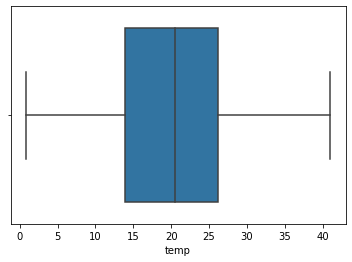

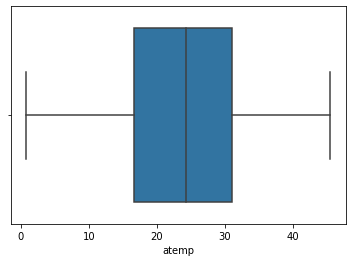

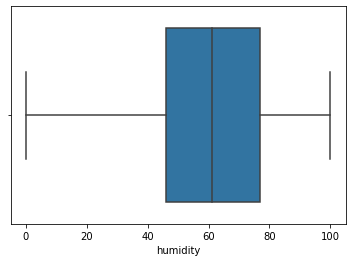

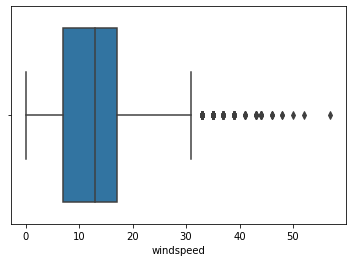

In [38]:
# create box plots to check for outliers. 
for each_col in orig_cont_features:
    sns.boxplot(training_data[each_col]);
    plt.show();

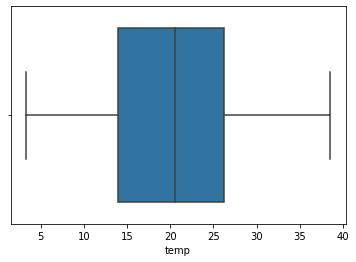

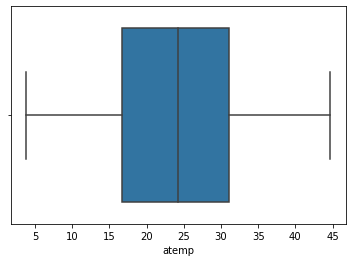

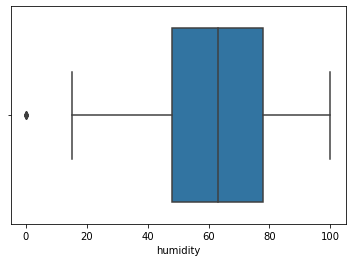

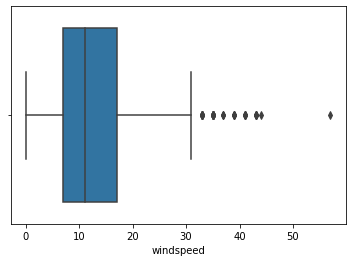

In [39]:
# check outliers in the testing data as well
for each_col in orig_cont_features:
    sns.boxplot(testing_data[each_col]);
    plt.show();

In [40]:
# to find outliers, we can create a function like below: 
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [41]:
# identify outliers in windspeed in training and testing data. 

# for training data. 
lowerbound,upperbound = outlier_treatment(training_data['windspeed'])
training_data[(training_data.windspeed < lowerbound) | (training_data.windspeed > upperbound)]
training_data.drop(training_data[(training_data.windspeed < lowerbound) | (training_data.windspeed > upperbound)].index,
                   inplace=True)

# for testing data. 
lowerbound,upperbound = outlier_treatment(testing_data['windspeed'])
testing_data[(testing_data.windspeed < lowerbound) | (testing_data.windspeed > upperbound)]
testing_data.drop(testing_data[(training_data.windspeed < lowerbound) | (testing_data.windspeed > upperbound)].index,
                   inplace=True)

In [42]:
# identify outliers in humidity in training and testing data. 

# for training data. 
lowerbound,upperbound = outlier_treatment(training_data['humidity'])
training_data[(training_data.humidity < lowerbound) | (training_data.humidity > upperbound)]
training_data.drop(training_data[(training_data.humidity < lowerbound) | (training_data.humidity > upperbound)].index,
                   inplace=True)

# for testing data. 
lowerbound,upperbound = outlier_treatment(testing_data['humidity'])
testing_data[(testing_data.humidity < lowerbound) | (testing_data.humidity > upperbound)]
testing_data.drop(testing_data[(testing_data.humidity < lowerbound) | (testing_data.humidity > upperbound)].index,
                   inplace=True)

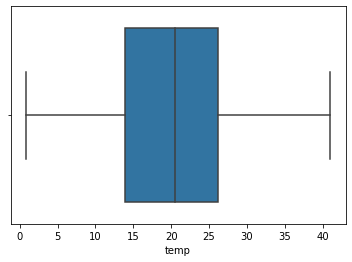

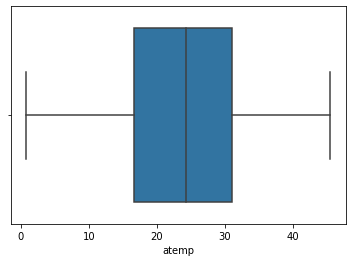

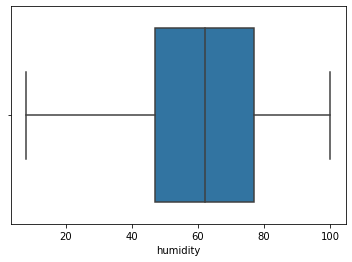

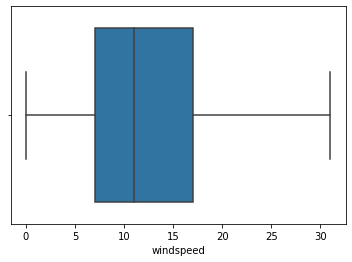

In [43]:
# create box plots to check for outliers. 
for each_col in orig_cont_features:
    sns.boxplot(training_data[each_col]);
    plt.show();

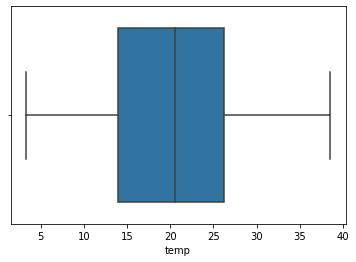

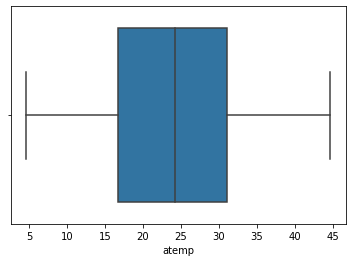

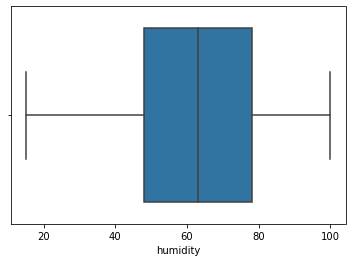

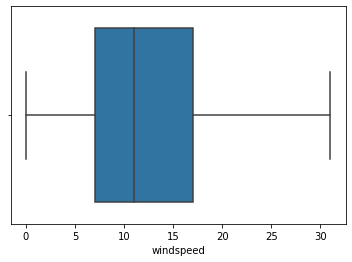

In [44]:
# check outliers in the testing data as well
for each_col in orig_cont_features:
    sns.boxplot(testing_data[each_col]);
    plt.show();

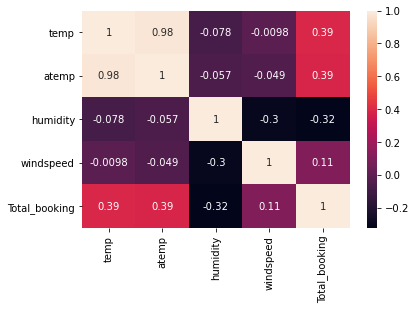

In [45]:
# perform correlation analysis on the training data. 
correlation_columns = orig_cont_features
correlation_columns.append('Total_booking')
sns.heatmap(training_data[correlation_columns].corr(), annot=True);
plt.show()

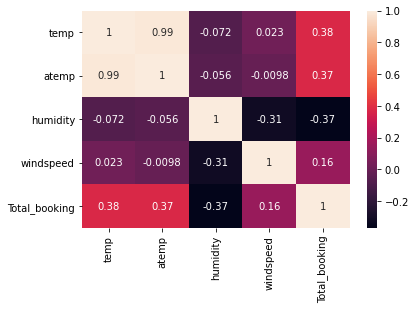

In [46]:
# optional: perform correlation analysis on the testing data. 
sns.heatmap(testing_data[correlation_columns].corr(), annot=True);
plt.show()

**Other Visualizations**

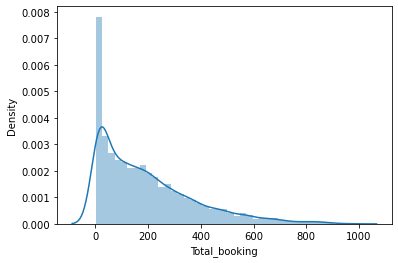

In [47]:
# Looking at the Total booking column. 
sns.distplot(training_data['Total_booking']);
plt.show()

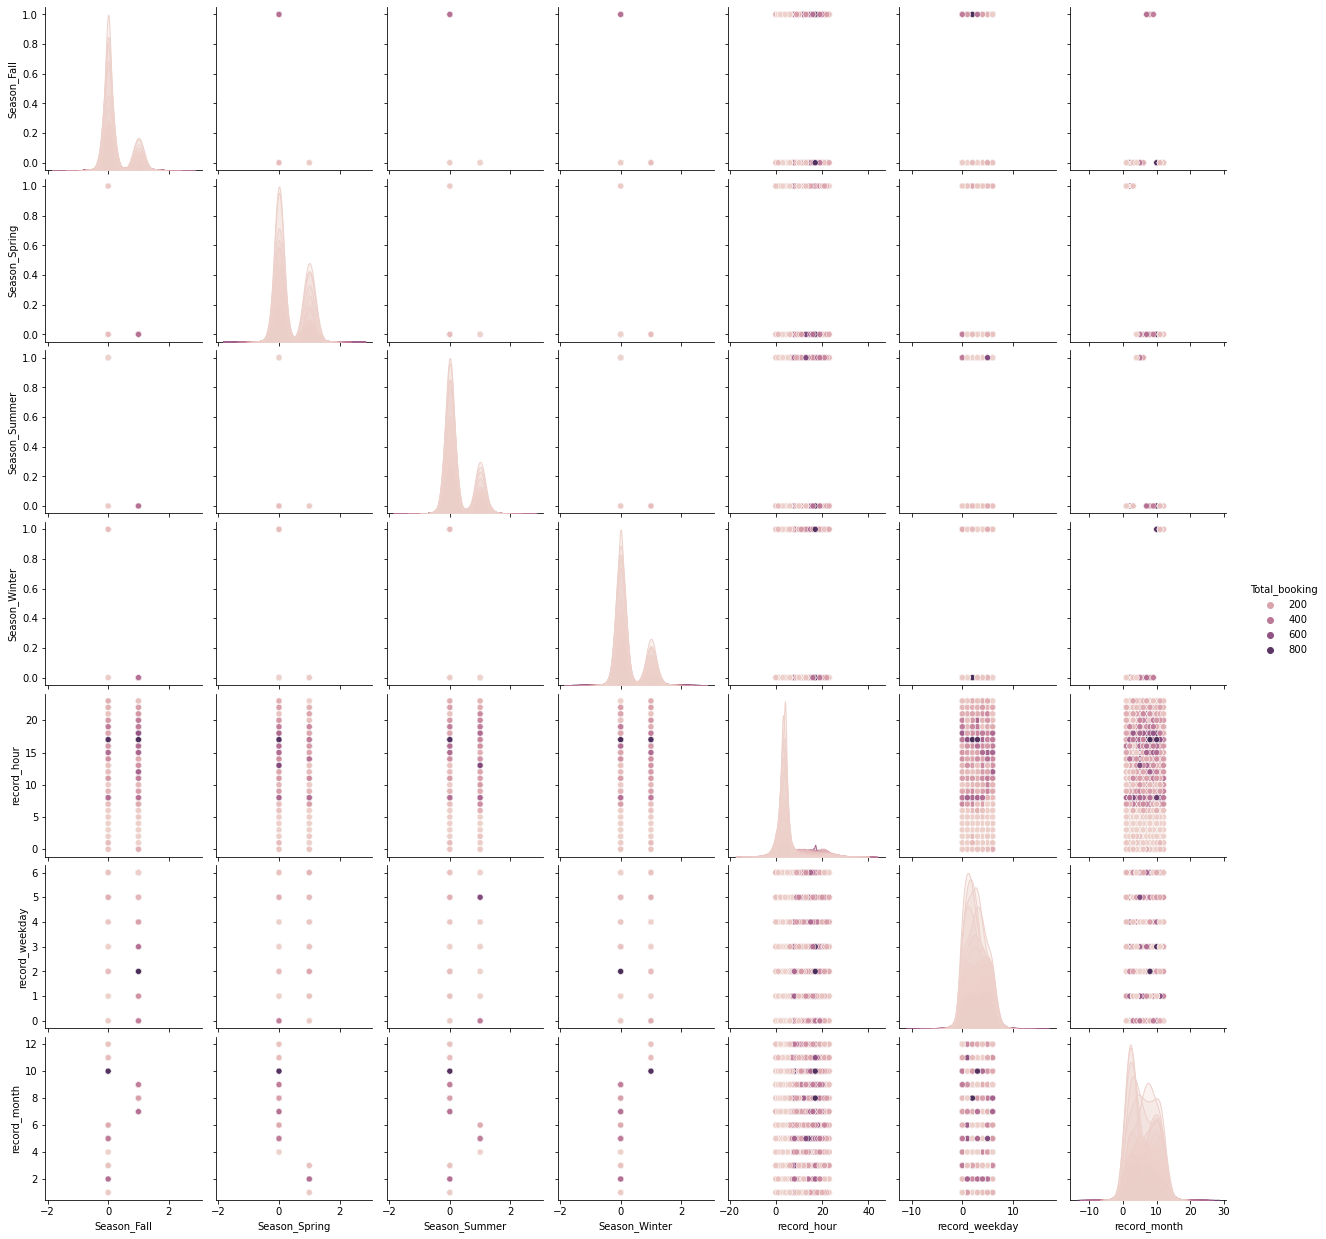

In [48]:
# further, we can analyse the target column with some more feature columns. 
selective_features = ['Season_Fall', 'Season_Spring', 'Season_Summer','Season_Winter','record_hour','record_weekday', 'record_month', 'Total_booking']
sns.pairplot(training_data[selective_features], hue='Total_booking');
plt.show();

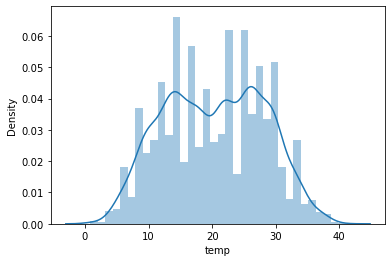

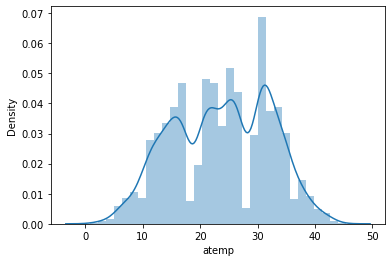

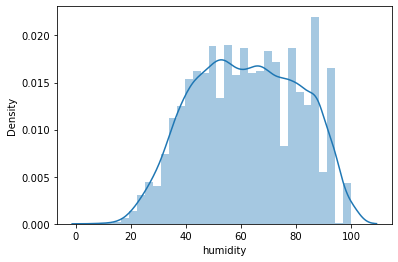

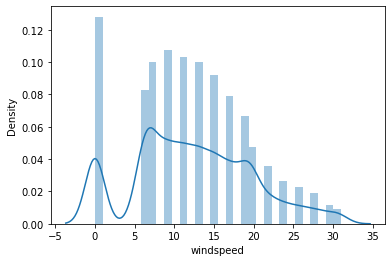

In [49]:
# check distribution of all the previously identified originally continuous columns
for each_col in correlation_columns: 
    if each_col != 'Total_booking':
        sns.distplot(training_data[each_col]);
        plt.show();

**Removing error data/rows if any.**

In [50]:
## Checking the statistical properties of all numerical columns. 
training_data[correlation_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
temp,8508.0,20.300108,7.815374,0.82,13.9400,20.5000,26.2400,41.0000
atemp,8508.0,23.734716,8.474707,0.76,16.6650,24.2400,31.0600,45.4550
humidity,8508.0,62.121885,18.823965,8.00,47.0000,62.0000,77.0000,100.0000
windspeed,8508.0,12.333777,7.492885,0.00,7.0015,11.0014,16.9979,31.0009
Total_booking,8508.0,193.356841,181.689908,1.00,43.0000,148.0000,286.2500,977.0000


In [51]:
## Checking cases where windspeed = 0
training_data[training_data['windspeed']==0].describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Weather_ClearFewclouds,Weather_LightSnowLightRain,Weather_MistCloudy,record_day,record_hour,record_weekday,record_month
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.0,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,0.035038,0.678030,19.884223,23.905199,67.675189,0.0,164.940341,0.275568,0.195076,0.193182,0.336174,0.690341,0.054924,0.254735,9.261364,10.130682,3.014205,7.267045
std,0.183963,0.467453,7.803559,7.601573,19.178621,0.0,175.927606,0.447012,0.396447,0.394981,0.472623,0.462572,0.227940,0.435919,5.541217,7.214254,2.004447,3.453509
min,0.000000,0.000000,2.460000,5.305000,17.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.120000,17.425000,53.000000,0.0,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,1.000000,5.000000
50%,0.000000,1.000000,19.680000,23.485000,70.000000,0.0,108.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9.000000,9.000000,3.000000,8.000000
75%,0.000000,1.000000,26.240000,31.060000,83.000000,0.0,247.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,14.000000,16.000000,5.000000,10.000000
max,1.000000,1.000000,39.360000,43.180000,100.000000,0.0,970.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,23.000000,6.000000,12.000000


### 3. Initial Modelling

In [52]:
# creating a separate dataframe with training and testing data combined
total_data = pd.concat([training_data, testing_data])

In [53]:
# Checking the total data. 
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10637 entries, 0 to 2177
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   holiday                     10637 non-null  int64  
 1   workingday                  10637 non-null  int64  
 2   temp                        10637 non-null  float64
 3   atemp                       10637 non-null  float64
 4   humidity                    10637 non-null  int64  
 5   windspeed                   10637 non-null  float64
 6   Total_booking               10637 non-null  int64  
 7   Season_Fall                 10637 non-null  uint8  
 8   Season_Spring               10637 non-null  uint8  
 9   Season_Summer               10637 non-null  uint8  
 10  Season_Winter               10637 non-null  uint8  
 11  Weather_ClearFewclouds      10637 non-null  uint8  
 12  Weather_LightSnowLightRain  10637 non-null  uint8  
 13  Weather_MistCloudy          1063

In [54]:
# checking sample rows from total data. 
total_data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Weather_ClearFewclouds,Weather_LightSnowLightRain,Weather_MistCloudy,record_day,record_date,record_hour,record_weekday,record_month
0,0,1,22.14,25.760,77,16.9979,504,0,0,1,0,1,0,0,2,2012-05-02,19,2,5
1,0,1,28.70,33.335,79,19.0012,5,1,0,0,0,1,0,0,5,2012-09-05,4,2,9
2,0,1,5.74,6.060,50,22.0028,139,0,1,0,0,1,0,0,13,2011-01-13,9,3,1
3,0,1,13.94,16.665,29,8.9981,209,0,0,0,1,1,0,0,18,2011-11-18,16,4,11
4,0,1,30.34,33.335,51,19.0012,184,1,0,0,0,1,0,0,13,2011-09-13,13,1,9


In [55]:
# Creating X,y sets from total data. 
X = total_data.drop(['Total_booking','record_date'], axis=1)
y = total_data['Total_booking']

In [56]:
# Creating the X,y sets for training and testing. 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [57]:
# Checking the shapes of training and testing sets. 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8509, 17)
(2128, 17)
(8509,)
(2128,)


In [58]:
# Trying with Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [59]:
# Checking metrics
print(r2_score(y_pred, y_test))
print(sqrt(mean_squared_error(y_pred, y_test)))

0.8578731312063321
61.724514400742905


In [60]:
# trying adaboost regressor
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
y_pred = abr.predict(X_test)

In [61]:
# Checking metrics
print(r2_score(y_pred, y_test))
print(sqrt(mean_squared_error(y_pred, y_test)))

0.4065376191743827
113.03831157340448


In [62]:
# Bagging Regressor
bgr = BaggingRegressor()
bgr.fit(X_train, y_train)
y_pred=bgr.predict(X_test)

In [63]:
# Checking metrics
print(r2_score(y_pred, y_test))
print(sqrt(mean_squared_error(y_pred, y_test)))

0.8394535141843682
66.03505121313835


In [64]:
# support vector regressor
svr = SVR()
svr.fit(X_train, y_train)
y_pred=svr.predict(X_test)

In [65]:
# Checking metrics
print(r2_score(y_pred, y_test))
print(sqrt(mean_squared_error(y_pred, y_test)))

-3.0426378271238557
154.70376694279278


In [66]:
# KNN Regressor
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_pred=knr.predict(X_test)

In [67]:
# Checking metrics
print(r2_score(y_pred, y_test))
print(sqrt(mean_squared_error(y_pred, y_test)))

0.25035065445841675
120.93072466984117


In [68]:
# Performing Grid Search Cross validation for RandomForest Regressor

n_folds=5

parameters={
    'n_estimators':range(100,500,100),
    'max_depth':range(10,30,5),
    'min_samples_split':range(5,20,5),
    'min_samples_leaf':range(5,20,5),
    'max_features':['auto','log2']
}

cv = GridSearchCV(estimator=rfr,
                 param_grid=parameters,
                 cv=n_folds,
                 n_jobs=-1,
                 verbose=1,
                 return_train_score=True,
                 scoring='neg_mean_squared_error')

cv.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(10, 30, 5),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(5, 20, 5),
                         'min_samples_split': range(5, 20, 5),
                         'n_estimators': range(100, 500, 100)},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [69]:
# checking the best model and its performance. 
print(cv.best_score_)
print(cv.best_estimator_)

-4757.546795245922
RandomForestRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=200)


In [72]:
# using the best model of Random Forest Regressor
rfr=RandomForestRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=200)
rfr.fit(X_train, y_train)
y_pred=rfr.predict(X_test)

In [73]:
# Checking metrics
print(r2_score(y_pred, y_test))
print(sqrt(mean_squared_error(y_pred, y_test)))

0.843214317831845
63.90895142510277


In [75]:
# Checking metrics
print(r2_score(y_pred, y_test))
print(sqrt(mean_squared_error(y_pred, y_test)))
print(sqrt(mean_squared_log_error(y_pred, y_test)))

0.843214317831845
63.90895142510277
0.39597782862651626


In [79]:
# feature importances
dict_feature_imp = {
    'Features':X.columns,
    'Importance':rfr.feature_importances_
}
feature_importances=pd.DataFrame(dict_feature_imp)
feature_importances.sort_values(by='Importance',inplace=True,ascending=False)
feature_importances.head()

,Features,Importance
14,record_hour,0.646559
2,temp,0.093940
1,workingday,0.048067
4,humidity,0.045658
15,record_weekday,0.040944


## End.